In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('customers.csv')

In [21]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [22]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
df.shape

(440, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [25]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [26]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [27]:
features = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
df_scaled = normalize(features)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)



,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


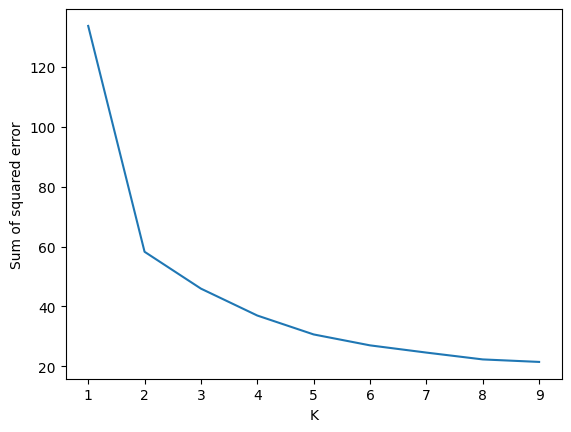

In [28]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

In [31]:
features = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
df_scaled = normalize(features)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

y_pred1 = kmeans.fit_predict(df_scaled)

df['Cluster'] = y_pred1
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [37]:
kmeans.cluster_centers_

array([[0.26408303, 0.47922149, 0.66190661, 0.13429499, 0.25144995,
        0.10540875],
       [0.86957306, 0.17495423, 0.2260608 , 0.22490371, 0.05007507,
        0.07400152]])

In [32]:
cluster0 = df[df['Cluster'] == 0]
cluster1 = df[df['Cluster'] == 1]


In [33]:
df['Category'] = df['Cluster'].map({
    0: 'Fresh & Frozen Bulk Buyers (Restaurants/Catering)',
    1: 'Retail Grocery & Milk Buyers (Supermarkets)'
})


In [34]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Category
0,2,3,12669,9656,7561,214,2674,1338,1,Retail Grocery & Milk Buyers (Supermarkets)
1,2,3,7057,9810,9568,1762,3293,1776,0,Fresh & Frozen Bulk Buyers (Restaurants/Catering)
2,2,3,6353,8808,7684,2405,3516,7844,0,Fresh & Frozen Bulk Buyers (Restaurants/Catering)
3,1,3,13265,1196,4221,6404,507,1788,1,Retail Grocery & Milk Buyers (Supermarkets)
4,2,3,22615,5410,7198,3915,1777,5185,1,Retail Grocery & Milk Buyers (Supermarkets)
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1,Retail Grocery & Milk Buyers (Supermarkets)
436,1,3,39228,1431,764,4510,93,2346,1,Retail Grocery & Milk Buyers (Supermarkets)
437,2,3,14531,15488,30243,437,14841,1867,0,Fresh & Frozen Bulk Buyers (Restaurants/Catering)
438,1,3,10290,1981,2232,1038,168,2125,1,Retail Grocery & Milk Buyers (Supermarkets)


In [35]:
import pickle
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))
pickle.dump(df_scaled, open("normalizer.pkl", "wb"))

In [36]:
 

 
model = pickle.load(open("kmeans_model.pkl", "rb"))

 
data = np.array([[29703,12051,16027,13135,182,2204]])

 
data_scaled = normalize(data)


cluster_label = model.predict(data_scaled)[0]

 
segment_names = {
    0: "Fresh & Frozen Bulk Buyers (Restaurants/Catering)",
    1: "Retail Grocery & Milk Buyers (Supermarkets)"
}

print("Predicted Cluster:", cluster_label)
print("Customer Segment:", segment_names[cluster_label])

Predicted Cluster: 1
Customer Segment: Retail Grocery & Milk Buyers (Supermarkets)


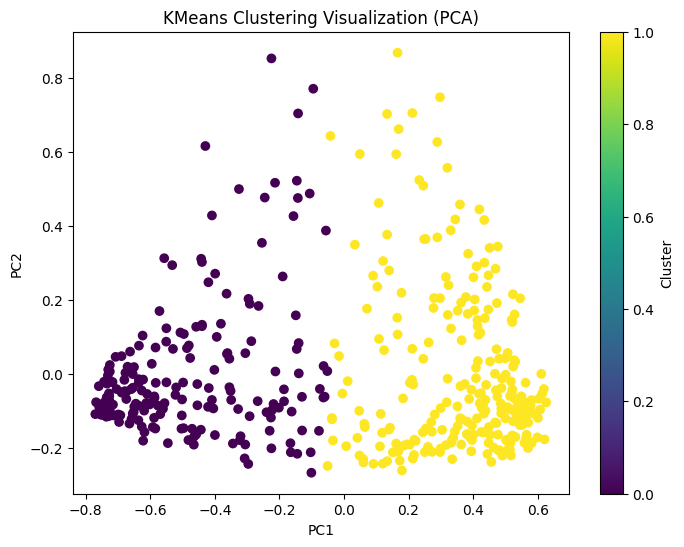

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import pandas as pd

# Your dataframe
# df = ...

# Select only your 6 columns
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

# Normalize
X_scaled = normalize(X)

# KMeans Model
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Reduce to 2D for scatter plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering Visualization (PCA)")
plt.colorbar(label='Cluster')
plt.show()
